--------------
### simple demonstration using the Keras Sequential model 

- for binary classification on the breast cancer dataset from sklearn. 
- This dataset is used to classify tumors into malignant (1) or benign (0):
---------------------

In [1]:
import numpy as np

from sklearn.datasets import load_breast_cancer

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from keras.models import Sequential
from keras.layers import Dense
from keras.utils import plot_model

import tensorflow as tf
import matplotlib.pyplot as plt

In [2]:
# Load the breast cancer dataset
data = load_breast_cancer()

X = data.data
y = data.target

In [3]:
# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [4]:
# Standardize the features
scaler = StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [5]:
# Define the model
model = Sequential()
model.add(Dense(32, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [6]:
#!pip install pydot

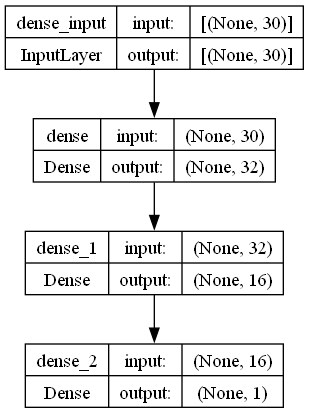

In [7]:
# Visualize the model architecture
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

In [8]:
# Define metrics
metrics = [
    'accuracy',
    tf.keras.metrics.AUC(name='auc'),
    tf.keras.metrics.Precision(name='precision'),
    tf.keras.metrics.Recall(name='recall'),
]

In [9]:
# Compile the model
model.compile(optimizer= 'adam', 
              loss     = 'binary_crossentropy', 
              metrics  = metrics)

In [10]:
# Train the model
history = model.fit(X_train, 
                    y_train, 
                    epochs=20, 
                    batch_size=32, 
                    validation_split=0.2, 
                    verbose=1)

Epoch 1/20
12/12 [==============================] - 2s 58ms/step - loss: 0.9761 - accuracy: 0.3434 - auc: 0.3974 - precision: 0.0769 - recall: 0.0044 - val_loss: 0.7508 - val_accuracy: 0.4066 - val_auc: 0.7503 - val_precision: 0.8333 - val_recall: 0.0862
Epoch 2/20
12/12 [==============================] - 0s 20ms/step - loss: 0.6331 - accuracy: 0.6071 - auc: 0.9051 - precision: 0.9885 - recall: 0.3772 - val_loss: 0.4906 - val_accuracy: 0.8022 - val_auc: 0.9613 - val_precision: 1.0000 - val_recall: 0.6897
Epoch 3/20
12/12 [==============================] - 0s 18ms/step - loss: 0.4349 - accuracy: 0.8599 - auc: 0.9689 - precision: 0.9836 - recall: 0.7895 - val_loss: 0.3610 - val_accuracy: 0.9231 - val_auc: 0.9804 - val_precision: 0.9811 - val_recall: 0.8966
Epoch 4/20
12/12 [==============================] - 0s 8ms/step - loss: 0.3201 - accuracy: 0.9258 - auc: 0.9838 - precision: 0.9809 - recall: 0.8991 - val_loss: 0.2877 - val_accuracy: 0.9341 - val_auc: 0.9862 - val_precision: 0.9643 - 

In [11]:
# Evaluate the model
results = model.evaluate(X_test, y_test)
print()

for name, value in zip(model.metrics_names, results):
    print(name, value)

4/4 [==============================] - 0s 10ms/step - loss: 0.0679 - accuracy: 0.9737 - auc: 0.9979 - precision: 0.9722 - recall: 0.9859

loss 0.06791744381189346
accuracy 0.9736841917037964
auc 0.9978710412979126
precision 0.9722222089767456
recall 0.98591548204422


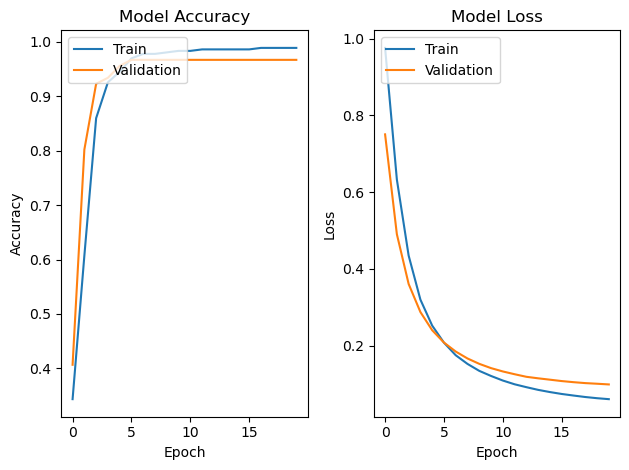

In [12]:
# Plot training & validation accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.tight_layout()